# Analisis de la actividad en Telegram NoName057(16)
----
_**Trabajo**: Cazando al oso: Informe CTI sobre NoName057(16)_<br>
_**Autores**: Ignacio José Mestre Villagrasa y Javier Domínguez Martín<br>_
_**Centro**: Kschool<br>_
_**Tutor**: Iván Portillo Morales_

<center>
<img src='../Images/telegram.png' height=400px width=400px/>
</center>

Este estudio se utiliza para descubrir los posibles patrones de comportamiento existentes en los mensajes de NoName , se hace uso de ../data/telegram.db donde se han recopilado los mensajes del grupo de difusion de NoName en ruso. Todo haciendo uso de tgcrawler que esta en scripts/tgcrawler.py

In [1]:
import sqlite3
import pandas as pd

db_path = '../data/telegram.db'
conn = sqlite3.connect(db_path)

# Análisis de actividad básica

In [2]:
noname_id = 1732250465

query = f"""
SELECT date, text
FROM messages
WHERE channel_id = {noname_id};
"""
messages_noname = pd.read_sql_query(query, conn)

messages_noname['date'] = pd.to_datetime(messages_noname['date'])
messages_noname['dia_semana'] = messages_noname['date'].dt.day_name()

activity_per_day = messages_noname['dia_semana'].value_counts().reset_index()
activity_per_day.columns = ['Dia de la semana', 'Numero de mensajes']

activity_per_day

,Dia de la semana,Numero de mensajes
0,Tuesday,997
1,Wednesday,991
2,Monday,967
3,Thursday,945
4,Friday,929
5,Saturday,818
6,Sunday,800


In [3]:
# Todos las fechas con mensajes
active_dates = messages_noname['date'].dt.date.unique()

# Creando el rango
min_date = messages_noname['date'].min().date()
max_date = messages_noname['date'].max().date()
all_dates = pd.date_range(start=min_date, end=max_date).date

# Fechas inactivas
inactive_dates = set(all_dates) - set(active_dates)
inactive_dates_sorted = sorted(list(inactive_dates))
inactive_dates_df = pd.DataFrame(inactive_dates_sorted, columns=['Fecha inactiva'])

inactive_dates_df

,Fecha inactiva
0,2022-03-16
1,2022-04-03
2,2022-04-30
3,2022-05-01
4,2022-05-02
5,2022-05-03
6,2022-05-22
7,2022-05-24


# Análisis de número de mensajes por día y hora

In [4]:
import matplotlib.pyplot as plt

# Convertir a fecha y correguir con la zona horaria de mi pc, ESPAÑA (donde se ejecuto el crawler, GMT+2)
messages_noname['date'] = pd.to_datetime(messages_noname['date']) - pd.Timedelta(hours=2)

messages_noname['date_only'] = messages_noname['date'].dt.date
messages_noname['hour_only'] = messages_noname['date'].dt.hour

messages_per_day = messages_noname.groupby('date_only').size()
messages_per_hour = messages_noname.groupby('hour_only').size()

## Por día

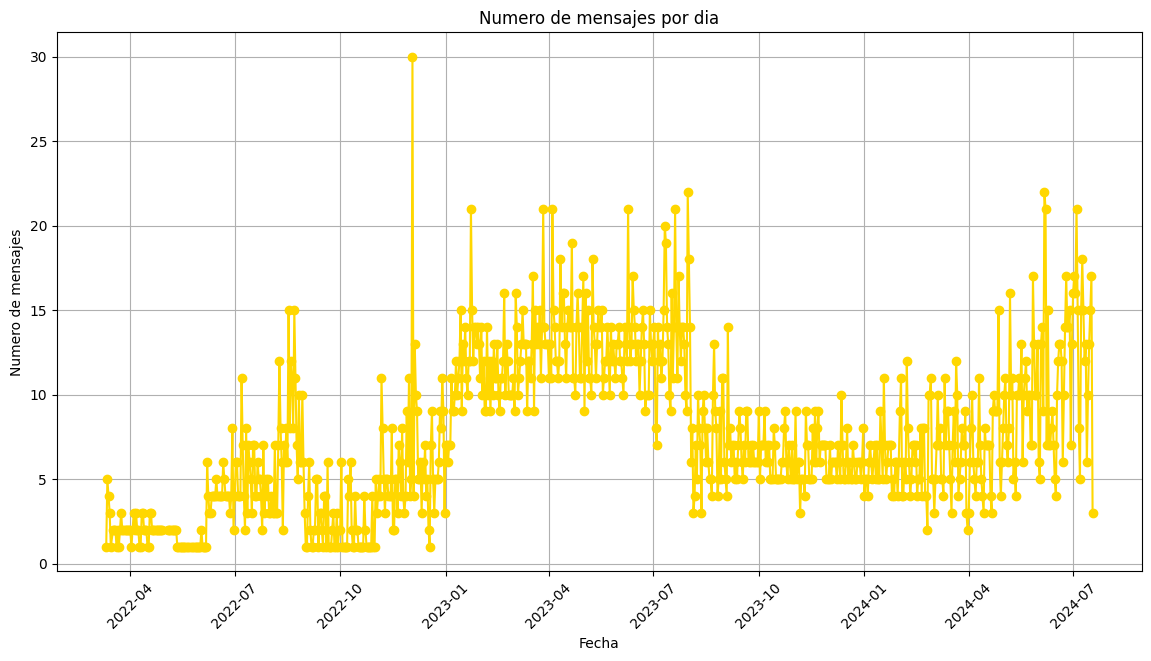

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(messages_per_day.index, messages_per_day.values, marker='o',color="#FFD700")
plt.title('Numero de mensajes por dia')
plt.xlabel('Fecha')
plt.ylabel('Numero de mensajes')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Análisis de número de mensajes por hora

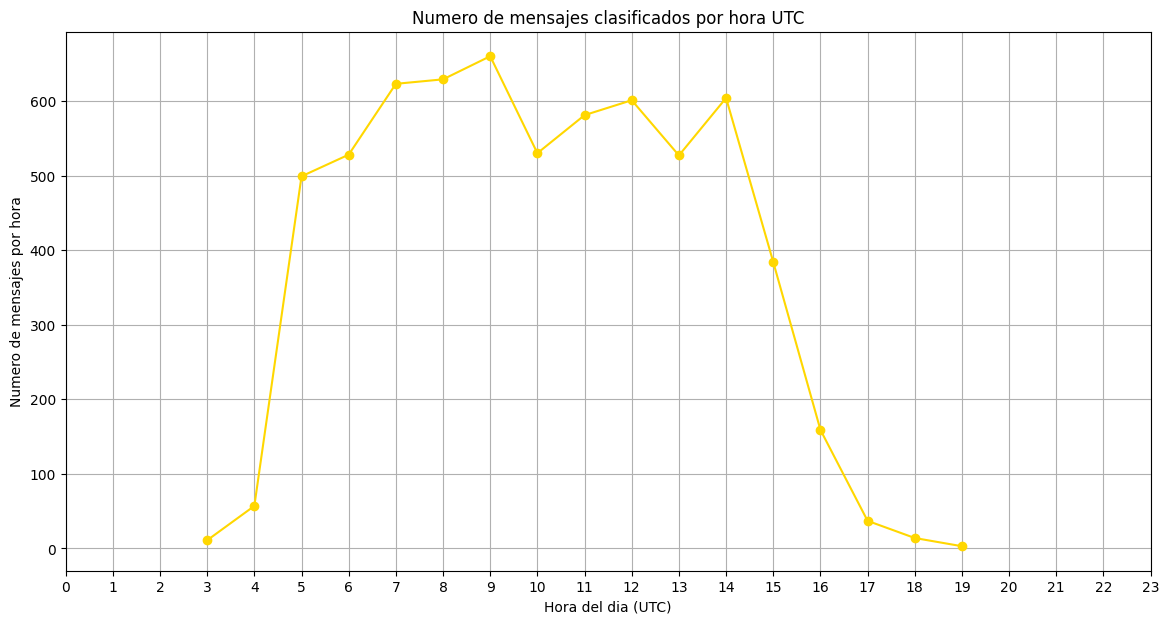

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(messages_per_hour.index, messages_per_hour.values, marker='o',color="#FFD700")
plt.title('Numero de mensajes clasificados por hora UTC')
plt.xlabel('Hora del dia (UTC)')
plt.ylabel('Numero de mensajes por hora')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

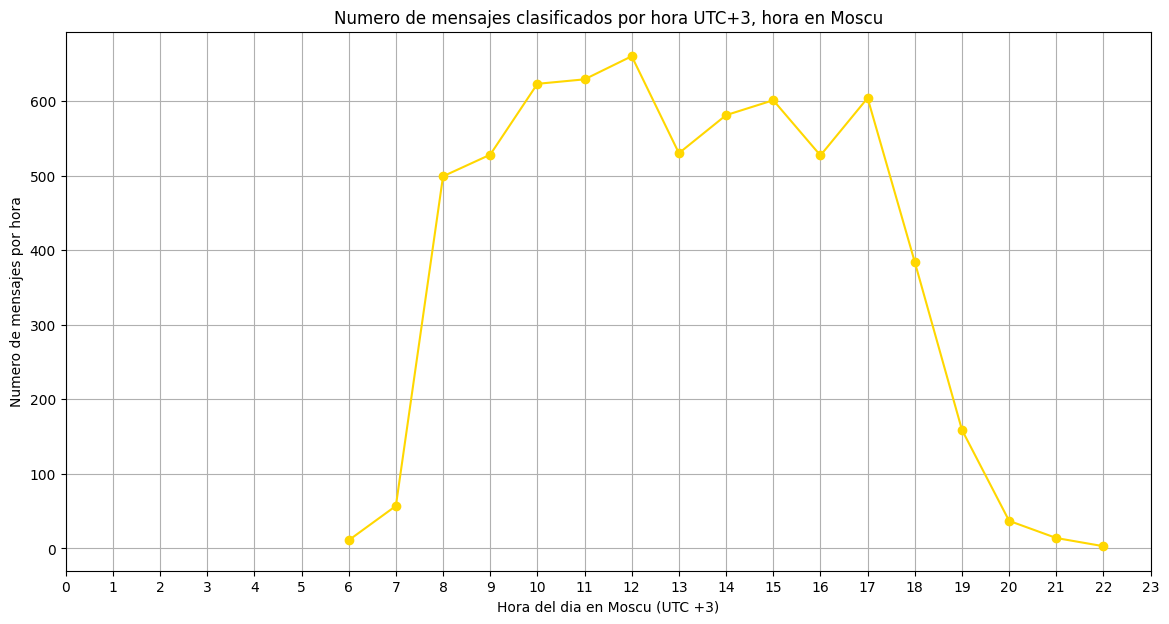

In [7]:
messages_noname['date'] = pd.to_datetime(messages_noname['date']) + pd.Timedelta(hours=3)

messages_noname['hour_only'] = messages_noname['date'].dt.hour
messages_per_hour = messages_noname.groupby('hour_only').size()

plt.figure(figsize=(14, 7))
plt.plot(messages_per_hour.index, messages_per_hour.values, marker='o',color="#FFD700")
plt.title('Numero de mensajes clasificados por hora UTC+3, hora en Moscu')
plt.xlabel('Hora del dia en Moscu (UTC +3)')
plt.ylabel('Numero de mensajes por hora')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# Días con más mensajes

In [8]:
day_with_most_messages_utc = messages_per_day.idxmax()
most_messages_count = messages_per_day.max()
"La fecha con mas mensajes es " + day_with_most_messages_utc.strftime("%d/%m/%Y")

'La fecha con mas mensajes es 03/12/2022'

# Palabras más usadas

In [11]:
from collections import Counter
from googletrans import Translator
import re

def clean_and_split(text):
    text = re.sub(r'[^\w\s]', '', text) 
    text = text.lower()  
    return text.split()


all_messages_text = ' '.join(messages_noname['text'].dropna())
all_words = clean_and_split(all_messages_text)
all_word_freq = Counter(all_words)

most_common_words_all = all_word_freq.most_common(10)

translator = Translator()
print("Las 10 palabras mas usadas")
for ind,word in enumerate(most_common_words_all):
    print(f"{ind+1}. [{word[1]}] {word[0]} -> {translator.translate(word[0], src='ru', dest='es').text}")

Las 10 palabras mas usadas
1. [11105] в -> V
2. [9285] на -> en
3. [8450] и -> Y
4. [4824] подписывайтесь -> Suscribir
5. [3231] наш -> nuestro
6. [2808] по -> Por
7. [2785] noname05716 -> Noname05716
8. [2664] не -> No
9. [2659] канал -> canal
10. [2512] каналhttpstmenoname05716_reserve -> Canalhttpstmenoname05716_reserve
